In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import neattext.functions as nfx

from textblob import TextBlob

from collections import Counter

from wordcloud import WordCloud

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

from sklearn.model_selection import train_test_split

import joblib

## Data Importation/Inspection

In [2]:
df = pd.read_csv("train.csv")
df.head()

,text,emotion
0,Yeah for coupons! Found this place randomly ...,neutral
1,i still love to feel a gentle breeze and hear ...,happiness
2,"Normal, fama devido ao programa de tv. A sobre...",neutral
3,im feeling a little less jaded,sadness
4,i have never shaken the feeling of ferocious p...,hate


In [3]:
df.shape

(8000, 2)

In [4]:
df.isnull().sum()

text       0
emotion    0
dtype: int64

In [5]:
df['emotion'].value_counts()

happiness    1468
neutral      1292
worry        1222
fun          1157
sadness      1146
hate         1143
surprise      572
Name: emotion, dtype: int64

<AxesSubplot:>

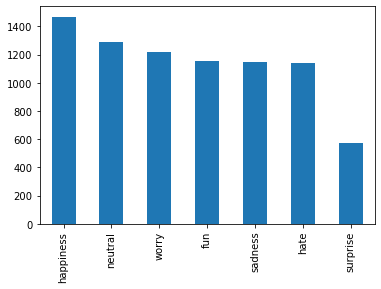

In [6]:
df['emotion'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='emotion', ylabel='count'>

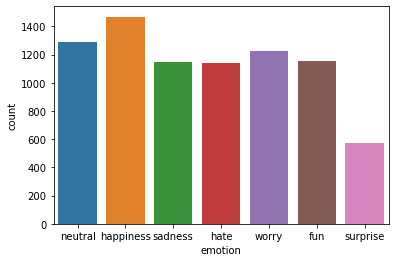

In [7]:
sns.countplot(x='emotion',data=df)

In [8]:
df['clean_text'] = df['text'].apply(nfx.remove_stopwords)
df['clean_text'] = df['clean_text'].apply(nfx.remove_punctuations)
df['clean_text'] = df['clean_text'].apply(nfx.remove_userhandles)
df['clean_text'] = df['clean_text'].apply(nfx.remove_multiple_spaces)
df.head()

,text,emotion,clean_text
0,Yeah for coupons! Found this place randomly ...,neutral,Yeah coupons Found place randomly like it lot ...
1,i still love to feel a gentle breeze and hear ...,happiness,love feel gentle breeze hear peal soft wind ch...
2,"Normal, fama devido ao programa de tv. A sobre...",neutral,Normal fama devido ao programa de tv sobremesa...
3,im feeling a little less jaded,sadness,im feeling little jaded
4,i have never shaken the feeling of ferocious p...,hate,shaken feeling ferocious protectiveness mother


In [9]:
emotion_list = df['emotion'].unique().tolist()
emotion_list

['neutral', 'happiness', 'sadness', 'hate', 'worry', 'fun', 'surprise']

## Tokenization and Emotion class plots

In [10]:
def extract_key_words(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [11]:
hate_list = df[df['emotion']=='hate']['clean_text'].tolist()
hate_docx = ' '.join(hate_list)
hate_docx

'shaken feeling ferocious protectiveness mother feel like real nut job freaked germs putting dangerous body feeling fucked pretty warm night know best good cant help feel irritated feel cold stony surface underneath feel jealous new children apprehensive longer favorite feel rebellious feel like stoner things alright feel like insulted know feel pain furious feel confused hurt furious feel extremely irritated self pitying subtext quote taking psychological toll colleagues want feel feeling offended people emotional state lately feel selfish know let spoil mood cause think little feel irritated love eyes think rest face comments feel like people overlook face distracted body feel bitter times feel enraged cruel sick malicious thoughtless existence forced live day day feel disgusted disappointed thinking think feel disgusted feel fought hard im feeling slightly offended feel little bit emptier ironically little bit envious feel sickened disgusted sins man despite divinity feel sickened d

In [12]:
hate_keys = extract_key_words(hate_docx)
hate_keys

{'feel': 763,
 'feeling': 370,
 'like': 202,
 'im': 175,
 'time': 67,
 'little': 64,
 'people': 58,
 'know': 55,
 'angry': 50,
 'think': 49,
 'things': 45,
 'want': 41,
 'way': 35,
 'bitter': 34,
 'frustrated': 34,
 'greedy': 34,
 'mad': 34,
 'going': 33,
 'cant': 32,
 'insulted': 32,
 'offended': 32,
 'selfish': 32,
 'irritable': 32,
 'resentful': 32,
 'dont': 32,
 'rushed': 32,
 'fucked': 31,
 'disgusted': 31,
 'annoyed': 31,
 'hated': 31,
 'today': 31,
 'cold': 30,
 'bit': 30,
 'violent': 29,
 'agitated': 28,
 'help': 27,
 'jealous': 27,
 'bothered': 27,
 'ive': 27,
 'cranky': 27,
 'rude': 27,
 'impatient': 26,
 'dissatisfied': 26,
 'stressed': 26,
 'right': 25,
 'irritated': 24,
 'feelings': 24,
 'bitchy': 24,
 'thing': 23,
 'got': 23}

In [13]:
def plot_words(doc):
    m_cloud = WordCloud().generate(doc)
    plt.figure(figsize=(20,10))
    plt.imshow(m_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

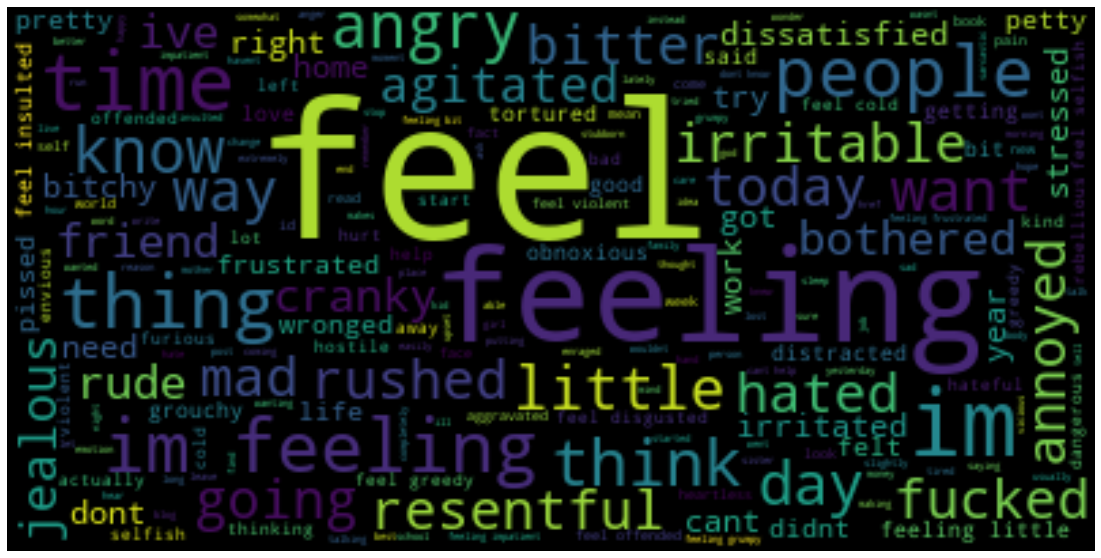

In [14]:
plot_words(hate_docx)

## Machine Learning 

In [15]:
Xfeatures = df['clean_text']
yfeatures = df['emotion']
Xfeatures

0       Yeah coupons Found place randomly like it lot ...
1       love feel gentle breeze hear peal soft wind ch...
2       Normal fama devido ao programa de tv sobremesa...
3                                 im feeling little jaded
4          shaken feeling ferocious protectiveness mother
                              ...                        
7995                     feel little weird telling people
7996                             feeling overwhelmed list
7997                         feel shocked words pure self
7998    Service sub par disappointing got food good ba...
7999                 feel like irritated wanna outta hear
Name: clean_text, Length: 8000, dtype: object

In [16]:
#Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [17]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
#Split Dataset
X_train,X_test,y_train,y_test = train_test_split(X,yfeatures,test_size=0.30,random_state=15)

In [19]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [20]:
#Accuracy
nv_model.score(X_test,y_test)

0.76125

In [21]:
y_nv_pred = nv_model.predict(X_test)
y_nv_pred

array(['hate', 'sadness', 'hate', ..., 'worry', 'worry', 'worry'],
      dtype='<U9')

In [22]:
sample_t = ['I hate Trump. Fuck him']
vect = cv.transform(sample_t).toarray()
prediction = nv_model.predict(vect)
print(prediction[0])

sadness


In [23]:
nv_model.predict_proba(vect)

array([[0.0441436 , 0.05637894, 0.25275056, 0.02366751, 0.33699532,
        0.01941784, 0.26664622]])

In [24]:
nv_model.classes_

array(['fun', 'happiness', 'hate', 'neutral', 'sadness', 'surprise',
       'worry'], dtype='<U9')

In [25]:
#Model Evaluation #
confusion_matrix(y_test,y_nv_pred)

array([[202,  88,   6,  17,  13,   0,  16],
       [  9, 402,   5,   3,   2,   0,   7],
       [  9,  37, 249,   8,  14,   1,  14],
       [  0,   1,   0, 380,   1,   1,   1],
       [  8,  55,  25,   4, 217,   0,  30],
       [ 21,  22,  17,   6,  13,  56,  53],
       [  4,  22,  18,   2,  16,   4, 321]], dtype=int64)

C:\Users\ToManari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


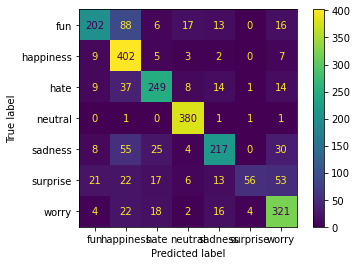

In [26]:
plot_confusion_matrix(nv_model,X_test,y_test)

Save Model

In [27]:
model_file = open('emotional_classifier_nvModel.pkl','wb')
joblib.dump(nv_model,model_file)
model_file.close()

Linear Regression

In [28]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

lr_model.score(X_test,y_test)

C:\Users\ToManari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8845833333333334

In [29]:
sample_t = ['Oh my god!!']
vect = cv.transform(sample_t).toarray()
prediction = lr_model.predict(vect)
print(prediction[0])

hate


In [30]:
lr_model.predict_proba(vect)

array([[0.26755064, 0.08234368, 0.28765842, 0.10630263, 0.09991937,
        0.0274336 , 0.12879166]])